In [121]:
import pandas as pd
import warnings

#excepting warnings
warnings.filterwarnings('ignore')

In [122]:
#New Vehicles registered by class data
new_vehicles = pd.read_excel("data/new_vehicles_registered.xls",sheet_name="Fuel",engine="xlrd", skiprows=2, skipfooter=2)

#Road accidents by severity of injuries
injury_2010 = pd.read_csv("data/roadaccidentdatabyseverityofinjuries2010.csv", skipfooter=1)
injury_2011 = pd.read_csv("data/road_accident_data_by_severity_of_injuries_2011.csv", skipfooter=1)
injury_2012 = pd.read_csv("data/road_accident_data_by_severity_of_injuries_2012.csv", skipfooter=1)

#Road accidents by vehicle type
type_2010 = pd.read_csv("data/road_accident_data_by_vehicle_type_2010.csv", skipfooter=1)
type_2011 = pd.read_csv("data/road_accident_data_by_vehicle_type_2011.csv", skipfooter=1)
type_2012 = pd.read_csv("data/road_accident_data_by_vehicle_type_2012.csv", skipfooter=1)

In [123]:
new_vehicles.head()

,CLASS OF VEHICLE,Fuel Type,2008,2009,2010,2011,2012
0,Motor Cars,Diesel,2457,1117,658,2642,5787
1,NaN,Petrol,17765,4600,22397,50810,23184
2,NaN,Electric,4,2,0,4414,2571
3,Motor Tricycles Car,Petrol,11,43,17,20,4
4,Motor Tricycles,Diesel,1877,2066,7361,14773,8194


Data Cleaning

In [124]:
new_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CLASS OF VEHICLE  19 non-null     object
 1   Fuel Type         33 non-null     object
 2   2008              33 non-null     object
 3   2009              33 non-null     object
 4   2010              33 non-null     int64 
 5   2011              33 non-null     object
 6   2012              33 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.9+ KB


In [125]:
#Filling Na values with the values above it this is for the index class of vehicle column 
new_vehicles.fillna(method="ffill", inplace=True)

#Replacing "-" values to 0 to insert meaningfull values
new_vehicles.replace("-", 0, inplace=True)

#Changing the data types of the columns to do aggregations when needed
new_vehicles[[2008,2009,2010,2011,2012]] = new_vehicles[[2008,2009,2010,2011,2012]].apply(pd.to_numeric)

new_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CLASS OF VEHICLE  33 non-null     object
 1   Fuel Type         33 non-null     object
 2   2008              33 non-null     int64 
 3   2009              33 non-null     int64 
 4   2010              33 non-null     int64 
 5   2011              33 non-null     int64 
 6   2012              33 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.9+ KB


In [126]:
new_vehicles.rename(columns={2008:"2008",2009:"2009",2010:"2010",2011:"2011",2012:"2012"}, inplace=True)

In [127]:
new_vehicles.describe().T

,count,mean,std,min,25%,50%,75%,max
2008,33.0,8036.333333,27887.242233,0.0,4.0,118.0,1877.0,155950.0
2009,33.0,6184.090909,24054.569435,0.0,3.0,127.0,1117.0,135420.0
2010,33.0,10886.151515,37508.468301,0.0,14.0,293.0,2472.0,204808.0
2011,33.0,15921.848485,48313.590480,0.0,19.0,573.0,6649.0,253305.0
2012,33.0,12039.242424,36198.663226,0.0,5.0,479.0,6221.0,192231.0


In [128]:
injury_2010.head()

,Districts,Deaths Male,Deaths Female,Grievous Injury Male,Grievous Injury Female,Non Grievous Injury Male,Non Grievous Injury Female,Total
0,Ampara,70,9,253,40,584,112,1068
1,Anuradhapura,118,25,402,99,747,224,1615
2,Badulla (Badulla & Bandarawela Divisions),64,6,154,33,300,137,694
3,Batticaloa,54,4,107,25,320,68,578
4,Chilaw (Chilaw & Puttalam Divisions),100,19,198,26,377,78,798


In [129]:
injury_2010.drop(columns="Total", inplace=True)
injury_2010["Year"] = "2010"

In [130]:
# Changing the columns to match following year data
injury_2010.rename(columns={"Districts":"Location", "Deaths Male": "No.of Deaths Male", "Deaths Female":"No.of Deaths Female"}, inplace=True)

In [131]:
injury_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Location                    25 non-null     object
 1   No.of Deaths Male           25 non-null     int64 
 2   No.of Deaths Female         25 non-null     int64 
 3   Grievous Injury Male        25 non-null     int64 
 4   Grievous Injury Female      25 non-null     int64 
 5   Non Grievous Injury Male    25 non-null     int64 
 6   Non Grievous Injury Female  25 non-null     int64 
 7   Year                        25 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [132]:
injury_2011.head()

,Location,No.of Deaths Male,No.of Deaths Female,Grievous Injury Male,Grievous Injury Female,Non Grievous Injury Male,Non Grievous Injury Female,Total
0,Ampara,63,15,231,59,573,158,1099
1,Anuradhapura,102,21,311,84,575,200,1293
2,Badulla (Badulla & Bandarawela Divisions),35,12,149,51,367,211,825
3,Batticaloa,45,9,183,30,507,95,869
4,Chilaw (Chilaw & Puttalam Divisions),140,19,267,69,420,98,1013


In [133]:
injury_2011.drop(columns="Total", inplace=True)
injury_2011["Year"] = "2011"

In [134]:
injury_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Location                    25 non-null     object
 1   No.of Deaths Male           25 non-null     int64 
 2   No.of Deaths Female         25 non-null     int64 
 3   Grievous Injury Male        25 non-null     int64 
 4   Grievous Injury Female      25 non-null     int64 
 5   Non Grievous Injury Male    25 non-null     int64 
 6   Non Grievous Injury Female  25 non-null     int64 
 7   Year                        25 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [135]:
injury_2012.head()

,Location,No.of Deaths Male,No.of Deaths Female,Grievous Injury Male,Grievous Injury Female,Non Grievous Injury Male,Non Grievous Injury Female,Total
0,Ampara,58,11,206,38,589,139,1041
1,Anuradhapura,134,18,391,76,746,222,1587
2,Badulla (Badulla & Bandarawela Divisions),51,8,141,34,323,152,709
3,Batticaloa,27,3,74,14,210,32,360
4,Chilaw (Chilaw & Puttalam Divisions),102,21,291,55,447,82,998


In [136]:
injury_2012.drop(columns="Total", inplace=True)
injury_2012["Year"] = "2012"

In [137]:
injury_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Location                    25 non-null     object
 1   No.of Deaths Male           25 non-null     int64 
 2   No.of Deaths Female         25 non-null     int64 
 3   Grievous Injury Male        25 non-null     int64 
 4   Grievous Injury Female      25 non-null     int64 
 5   Non Grievous Injury Male    25 non-null     int64 
 6   Non Grievous Injury Female  25 non-null     int64 
 7   Year                        25 non-null     object
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [138]:
injury_data = pd.concat([injury_2010, injury_2011, injury_2012], axis=0, ignore_index=True)

In [139]:
injury_data.describe().T

,count,mean,std,min,25%,50%,75%,max
No.of Deaths Male,75.0,85.266667,71.471093,0.0,35.0,64.0,111.0,332.0
No.of Deaths Female,75.0,18.186667,17.690808,0.0,5.5,13.0,27.5,75.0
Grievous Injury Male,75.0,269.853333,243.549245,2.0,90.5,224.0,322.0,1090.0
Grievous Injury Female,75.0,67.666667,66.053486,2.0,23.5,48.0,92.0,333.0
Non Grievous Injury Male,75.0,601.013333,523.330718,4.0,309.0,420.0,746.5,2098.0
Non Grievous Injury Female,75.0,191.480000,167.745251,0.0,80.0,138.0,255.5,675.0


In [140]:
type_2010.head() 

,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other,Total
0,Ampara,38,83,154,130,631,127,6,18,24,2,46,1,1,1261
1,Anuradhapura,76,176,261,182,817,159,8,26,100,2,49,1,0,1857
2,Badulla (Badulla & Bandarawela Divisions),61,107,150,18,227,152,1,54,71,0,15,0,0,856
3,Batticaloa,17,72,90,135,374,66,3,10,22,1,20,1,1,812
4,Chilaw (Chilaw & Puttalam Divisions),92,157,221,83,436,114,4,18,68,2,14,0,0,1209


In [141]:
type_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Location                                 25 non-null     object
 1   Motor Car                                25 non-null     int64 
 2   Dual Purpose Vehicle                     25 non-null     int64 
 3   Lorry                                    25 non-null     int64 
 4   Cycle                                    25 non-null     int64 
 5   Motor Cycle/Moped                        25 non-null     int64 
 6   Three wheeler                            25 non-null     int64 
 7   Articulated Vehicle, prime mover         25 non-null     int64 
 8   SLT Bus                                  25 non-null     int64 
 9   Private Bus                              25 non-null     int64 
 10  Intercity Bus                            25 non-null     int64 


In [142]:
type_2011.head()

,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other,Total
0,Ampara,40,100,104,118,578,143,3,26,40,1,42,0,3,1198
1,Anuradhapura,79,164,196,143,691,162,2,33,75,4,39,0,4,1592
2,Badulla (Badulla & Bandarawela Divisions),88,139,159,14,220,231,4,54,101,2,13,0,1,1026
3,Batticaloa,33,85,98,167,518,114,1,26,29,0,35,2,0,1108
4,Chilaw (Chilaw & Puttalam Divisions),97,202,243,123,548,120,10,23,100,2,21,0,3,1492


In [143]:
type_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Location                                 25 non-null     object
 1   Motor Car                                25 non-null     int64 
 2   Dual Purpose Vehicle                     25 non-null     int64 
 3   Lorry                                    25 non-null     int64 
 4   Cycle                                    25 non-null     int64 
 5   Motor Cycle/Moped                        25 non-null     int64 
 6   Three wheeler                            25 non-null     int64 
 7   Articulated Vehicle, prime mover         25 non-null     int64 
 8   SLT Bus                                  25 non-null     int64 
 9   Private Bus                              25 non-null     int64 
 10  Intercity Bus                            25 non-null     int64 


In [144]:
type_2012.head()

,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other,Total
0,Ampara,59,102,121,93,575,169,4,15,35,1,41,4,0,1219
1,Anuradhapura,116,224,246,158,845,196,2,28,104,3,72,0,6,2000
2,Badulla (Badulla & Bandarawela Divisions),82,121,171,20,266,219,2,58,78,1,16,0,5,1039
3,Batticaloa,26,43,30,64,224,52,4,9,25,1,24,1,2,505
4,Chilaw (Chilaw & Puttalam Divisions),102,213,224,134,530,163,14,23,84,1,19,1,3,1511


In [145]:
type_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Location                                 25 non-null     object
 1   Motor Car                                25 non-null     int64 
 2   Dual Purpose Vehicle                     25 non-null     int64 
 3   Lorry                                    25 non-null     int64 
 4   Cycle                                    25 non-null     int64 
 5   Motor Cycle/Moped                        25 non-null     int64 
 6   Three wheeler                            25 non-null     int64 
 7   Articulated Vehicle, prime mover         25 non-null     int64 
 8   SLT Bus                                  25 non-null     int64 
 9   Private Bus                              25 non-null     int64 
 10  Intercity Bus                            25 non-null     int64 


In [146]:
type_2010.drop(columns="Total", inplace=True)
type_2011.drop(columns="Total", inplace=True)
type_2012.drop(columns="Total", inplace=True)

type_2010["Year"] = "2010"
type_2011["Year"] = "2011"
type_2012["Year"] = "2012"

In [147]:
vehicle_type = pd.concat([type_2010, type_2011, type_2012], axis=0, ignore_index=True)
vehicle_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Location                                 75 non-null     object
 1   Motor Car                                75 non-null     int64 
 2   Dual Purpose Vehicle                     75 non-null     int64 
 3   Lorry                                    75 non-null     int64 
 4   Cycle                                    75 non-null     int64 
 5   Motor Cycle/Moped                        75 non-null     int64 
 6   Three wheeler                            75 non-null     int64 
 7   Articulated Vehicle, prime mover         75 non-null     int64 
 8   SLT Bus                                  75 non-null     int64 
 9   Private Bus                              75 non-null     int64 
 10  Intercity Bus                            75 non-null     int64 


In [148]:
vehicle_type.describe().T

,count,mean,std,min,25%,50%,75%,max
Motor Car,75.0,446.426667,1235.738669,0.0,34.5,70.0,285.0,6939.0
Dual Purpose Vehicle,75.0,386.120000,751.951532,5.0,86.0,144.0,342.0,4011.0
Lorry,75.0,316.146667,431.883327,2.0,101.0,159.0,342.5,1960.0
Cycle,75.0,100.400000,87.787674,2.0,29.5,70.0,142.0,386.0
Motor Cycle/Moped,75.0,662.173333,744.402579,3.0,246.5,418.0,661.0,3152.0
Three wheeler,75.0,365.226667,579.413766,0.0,89.0,172.0,398.5,2945.0
"Articulated Vehicle, prime mover",75.0,15.986667,36.641615,0.0,2.0,4.0,10.5,175.0
SLT Bus,75.0,51.026667,54.243439,0.0,15.5,32.0,70.5,260.0
Private Bus,75.0,183.440000,310.941475,3.0,37.5,75.0,217.0,1674.0
Intercity Bus,75.0,2.360000,3.240954,0.0,0.0,1.0,3.0,17.0


Descriptive Analysis

In [149]:
new_vehicles.head()

,CLASS OF VEHICLE,Fuel Type,2008,2009,2010,2011,2012
0,Motor Cars,Diesel,2457,1117,658,2642,5787
1,Motor Cars,Petrol,17765,4600,22397,50810,23184
2,Motor Cars,Electric,4,2,0,4414,2571
3,Motor Tricycles Car,Petrol,11,43,17,20,4
4,Motor Tricycles,Diesel,1877,2066,7361,14773,8194


In [150]:
new_vehicles_grouped = new_vehicles.groupby("CLASS OF VEHICLE").sum()

new_vehicles_grouped.drop(columns="Fuel Type", inplace=True)

In [151]:
new_vehicles_grouped.reset_index()

,CLASS OF VEHICLE,2008,2009,2010,2011,2012
0,Ambulances,141,71,53,58,66
1,Buses,1180,739,2491,4248,3095
2,Dual purpose Vehicles,2856,1280,2708,12701,11705
3,Hearses,21,15,15,22,30
4,Land vehicles - Trailer,1775,1333,2301,3121,3442
5,Land vehicles-Tractor (2Wh),20724,11473,12974,13424,12229
6,Land vehicles-Tractor (4Wh),3339,2292,4310,6649,6221
7,Lorry - Others(Folk Lift),76,23,11,0,0
8,Lorry - Proper,13588,7823,10803,12446,10445
9,Lorry - Tractors (Prime mover),106,183,293,573,283


In [152]:
new_vehicles_grouped['Total'] = new_vehicles_grouped[["2008", "2009", "2010", "2011", "2012"]].sum(axis=1)
new_vehicles_grouped = new_vehicles_grouped.sort_values(by="Total", ascending=False)

new_vehicles_grouped = new_vehicles_grouped.reset_index()
top_records = new_vehicles_grouped.head()

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

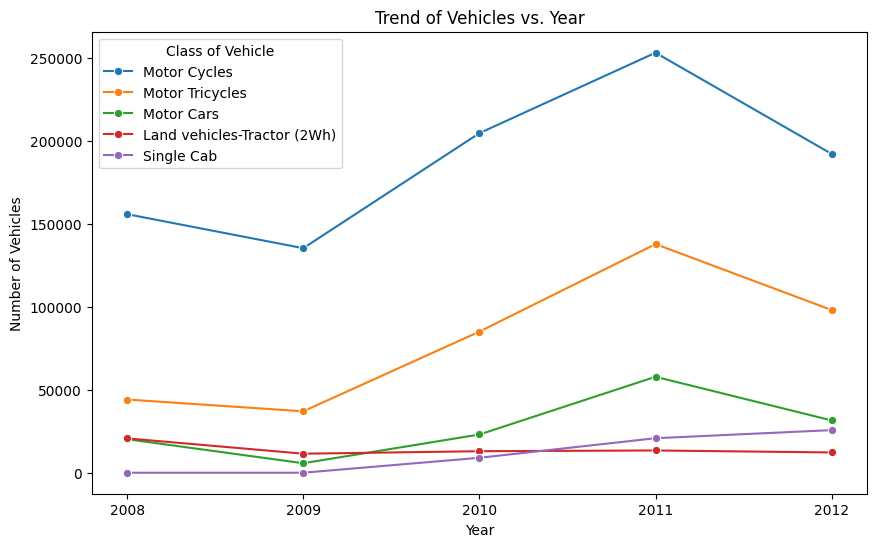

In [154]:
# Melt the DataFrame to reshape it for plotting
melted_df = pd.melt(top_records, id_vars=['CLASS OF VEHICLE'], value_vars=["2008", "2009", "2010", "2011", "2012"], 
                     var_name='Year', value_name='Number of Vehicles')


# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='Year', y='Number of Vehicles', hue='CLASS OF VEHICLE', marker='o')
plt.title('Trend of Vehicles vs. Year')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Class of Vehicle')
plt.show()

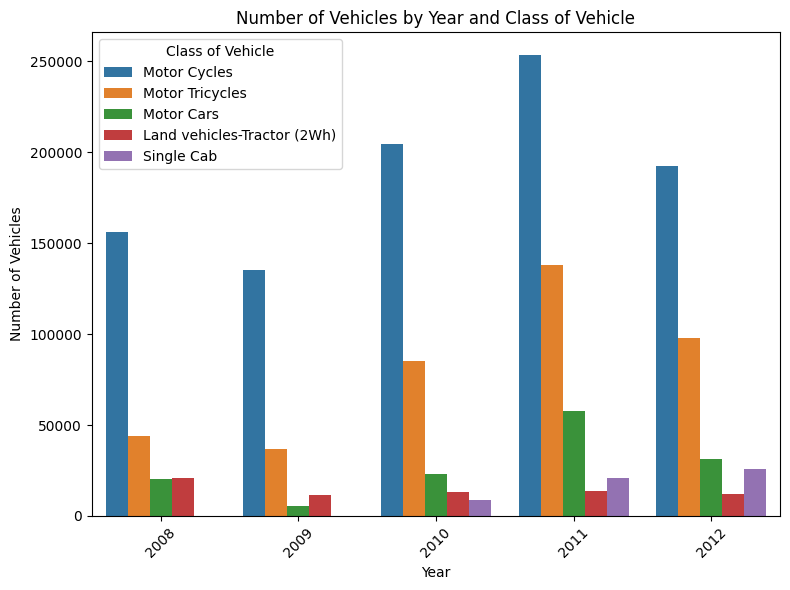

In [155]:
# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=melted_df, x='Year', y='Number of Vehicles', hue='CLASS OF VEHICLE', ci=None)
plt.title('Number of Vehicles by Year and Class of Vehicle')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend(title='Class of Vehicle')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [156]:
top_districts = vehicle_type.groupby(["Location"]).sum()
top_districts = top_districts.reset_index()
# top_districts = top_districts.sort_values(by= ,ascending=False)

In [157]:
top_districts.drop(columns="Year", inplace=True)
top_districts["Total"] =  top_districts[['Motor Car', 'Dual Purpose Vehicle', 'Lorry', 'Cycle','Motor Cycle/Moped', 'Three wheeler',
       'Articulated Vehicle, prime mover', 'SLT Bus', 'Private Bus',
       'Intercity Bus', 'Land Vehicle/Tractor',
       'Animal drawn vehicle or rider on animal', 'Other']].sum(axis=1)

top_districts = top_districts.sort_values(by="Total", ascending=False).head()

In [158]:
top_districts = top_districts.reset_index()

In [159]:
top_districts.drop(columns="index")

,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other,Total
0,"Colombo (Colombo-South, North, Central, Mt. La...",18098,10638,5576,710,9097,8333,337,690,4520,20,171,5,102,58297
1,"Gampaha (Gampaha, Negombo & Kelaniya Divisions)",6232,5541,4504,1032,8046,4254,470,460,1998,23,141,5,17,32723
2,"Kurunegala (Kurunegala, Kuliyapitiya & Nikawer...",1035,1393,1720,619,4452,1263,65,284,702,14,159,1,21,11728
3,Kandy (Kandy & Gampola Divisions),1946,1713,1377,74,1913,2163,17,399,1125,9,28,1,22,10787
4,Galle (Galle & Elpitiya Divisions),1292,1214,1065,671,3751,1514,35,224,736,18,62,0,11,10593


In [193]:
top_districts_final = vehicle_type.groupby(["Location","Year"]).sum()
top_districts_final = top_districts_final.reset_index()

In [194]:
filter_cols = top_districts.Location.values.tolist()

In [195]:
top_districts_final = top_districts_final[top_districts_final['Location'].isin(filter_cols)]
top_districts_final = top_districts_final.reset_index()
top_districts_final.drop(columns=["index", "Year"],inplace=True)

In [198]:
top_districts_final

,Location,Motor Car,Dual Purpose Vehicle,Lorry,Cycle,Motor Cycle/Moped,Three wheeler,"Articulated Vehicle, prime mover",SLT Bus,Private Bus,Intercity Bus,Land Vehicle/Tractor,Animal drawn vehicle or rider on animal,Other
0,"Colombo (Colombo-South, North, Central, Mt. La...",6451,4011,1930,257,3110,2584,84,260,1652,7,60,2,7
1,"Colombo (Colombo-South, North, Central, Mt. La...",6939,3952,1960,232,3152,2945,143,240,1674,9,52,3,32
2,"Colombo (Colombo-South, North, Central, Mt. La...",4708,2675,1686,221,2835,2804,110,190,1194,4,59,0,63
3,Galle (Galle & Elpitiya Divisions),364,406,348,239,1107,420,5,75,235,7,24,0,0
4,Galle (Galle & Elpitiya Divisions),440,431,369,216,1298,508,14,76,277,8,22,0,2
5,Galle (Galle & Elpitiya Divisions),488,377,348,216,1346,586,16,73,224,3,16,0,9
6,"Gampaha (Gampaha, Negombo & Kelaniya Divisions)",2035,2012,1536,386,2685,1308,139,168,673,5,57,0,5
7,"Gampaha (Gampaha, Negombo & Kelaniya Divisions)",2179,1841,1616,329,2763,1480,156,169,735,9,46,1,6
8,"Gampaha (Gampaha, Negombo & Kelaniya Divisions)",2018,1688,1352,317,2598,1466,175,123,590,9,38,4,6
9,Kandy (Kandy & Gampola Divisions),556,542,427,24,571,564,2,118,338,4,10,0,0


In [199]:
injury_data

,Location,No.of Deaths Male,No.of Deaths Female,Grievous Injury Male,Grievous Injury Female,Non Grievous Injury Male,Non Grievous Injury Female,Year
0,Ampara,70,9,253,40,584,112,2010
1,Anuradhapura,118,25,402,99,747,224,2010
2,Badulla (Badulla & Bandarawela Divisions),64,6,154,33,300,137,2010
3,Batticaloa,54,4,107,25,320,68,2010
4,Chilaw (Chilaw & Puttalam Divisions),100,19,198,26,377,78,2010
...,...,...,...,...,...,...,...,...
70,Polonnaruwa,58,6,186,51,312,70,2012
71,Ratnapura,106,28,315,83,609,219,2012
72,Tangalle (Tangalle Division),107,18,194,47,353,88,2012
73,Trincomalee (Trincomalee & Kantale Divisions),22,4,90,13,329,63,2012


In [203]:
# injury_data["No.of Deaths Male_Total"] = injury_data.groupby(injury_data["Location","No.of Deaths Male"]).sum() 